In [1]:
#1. Define the Problem
#اكثر مدينة يتم بيع العقار فيها
#اكثر المساحات يتم الطلب عليها
#اكثر الاحياء مبيعا لكل مدينة في السعودية
#هل يوجد فرق ذو دلالة احصائية بين الربع الأول في 2023 و2024 
#هل يوجد فرق ذو دلالة احصائية بين الربع الثاني في 2023 و2024
#توقع لمبيعات حي الخير شمال الرياض

In [2]:
#2. Data Collection
import pandas as pd
import numpy as np
from scipy import stats

In [43]:
# Replace 'your_file.xlsx' with the path to your Excel file
file_path = '/Users/khaled/Downloads/RealEstate-per Q.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)


In [4]:
#3. Data Exploration
# View the first few rows
df.head()

,المنطقة,المدينة,المدينة / الحي,الرقم المرجعي للصفقة,تاريخ الصفقة ميلادي,تصنيف العقار,نوع العقار,عدد العقارات,السعر,المساحة,الربع,العام
0,منطقة الرياض,الافلاج,حي/أخرى,18923186,1/1/2023,سكني,قطعة أرض,1,32000.0,630.0,Q1,2023
1,منطقة الرياض,الافلاج,حي/الريان,18920819,1/1/2023,سكني,قطعة أرض,1,60000.0,690.0,Q1,2023
2,منطقة الرياض,الخرج,حي/827 حى هجرة الصاع,18923523,1/1/2023,سكني,قطعة أرض,1,20000.0,630.0,Q1,2023
3,منطقة الرياض,الخرج,حي/الاندلس,18909006,1/1/2023,سكني,قطعة أرض,1,140000.0,333.0,Q1,2023
4,منطقة الرياض,الخرج,حي/الخالديه,18857540,1/1/2023,سكني,قطعة أرض,1,50000.0,380.0,Q1,2023


In [285]:
#to know what your data contain
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291158 entries, 0 to 291157
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   المنطقة               291158 non-null  object 
 1   المدينة               291158 non-null  object 
 2   المدينة / الحي        291158 non-null  object 
 3   الرقم المرجعي للصفقة  291158 non-null  int64  
 4   تاريخ الصفقة ميلادي   291158 non-null  object 
 5   تصنيف العقار          291158 non-null  object 
 6   نوع العقار            131447 non-null  object 
 7   عدد العقارات          291158 non-null  object 
 8   السعر                 291158 non-null  float64
 9   المساحة               291158 non-null  float64
 10  الربع                 291158 non-null  object 
 11  العام                 291158 non-null  int64  
 12  سعر المتر             291157 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 28.9+ MB


In [284]:
# Summary statistics
print(df.describe())

       الرقم المرجعي للصفقة         السعر       المساحة          العام  \
count          2.911580e+05  2.911580e+05  2.911580e+05  291158.000000   
mean           2.141095e+07  1.138277e+06  5.002527e+03    2023.368769   
std            1.493571e+06  1.215322e+07  8.447016e+04       0.482472   
min            1.870382e+07  5.000000e+03  0.000000e+00    2023.000000   
25%            2.014462e+07  1.500000e+05  3.000000e+02    2023.000000   
50%            2.140672e+07  4.200000e+05  5.000000e+02    2023.000000   
75%            2.260709e+07  8.600000e+05  7.000000e+02    2024.000000   
max            2.428001e+07  2.657190e+09  1.963890e+07    2024.000000   

           سعر المتر  
count  291157.000000  
mean     1846.616527  
std      3529.873668  
min         0.002500  
25%       276.190000  
50%       924.499230  
75%      2481.993381  
max    409837.409303  


In [268]:
#to measure the relationship between variables 
df.corr()

/var/folders/81/6kncbtk11wb5b4zdps5z_hx80000gn/T/ipykernel_57319/2672788888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,الرقم المرجعي للصفقة,السعر,المساحة,العام,سعر المتر
الرقم المرجعي للصفقة,1.000000,0.004585,-0.010031,0.833333,0.036752
السعر,0.004585,1.000000,0.162449,0.003458,0.211305
المساحة,-0.010031,0.162449,1.000000,-0.008131,-0.027164
العام,0.833333,0.003458,-0.008131,1.000000,0.034461
سعر المتر,0.036752,0.211305,-0.027164,0.034461,1.000000


In [93]:
#beacuse we don't have column for price for meter we create a one
df['سعر المتر'] = df['السعر'] / df['المساحة']

In [8]:
#4. Data Cleaning
# Check for missing values
print(df.isnull().sum())

المنطقة                      0
المدينة                      0
المدينة / الحي               0
الرقم المرجعي للصفقة         0
تاريخ الصفقة ميلادي          0
تصنيف العقار                 0
نوع العقار              159711
عدد العقارات                 0
السعر                        0
المساحة                      0
الربع                        0
العام                        0
dtype: int64


In [271]:
# Check for duplicates
df.drop_duplicates()

,المنطقة,المدينة,المدينة / الحي,الرقم المرجعي للصفقة,تاريخ الصفقة ميلادي,تصنيف العقار,نوع العقار,عدد العقارات,السعر,المساحة,الربع,العام,سعر المتر
0,منطقة الرياض,الافلاج,حي/أخرى,18923186,1/1/2023,سكني,قطعة أرض,1,32000.0,630.00,Q1,2023,50.793651
1,منطقة الرياض,الافلاج,حي/الريان,18920819,1/1/2023,سكني,قطعة أرض,1,60000.0,690.00,Q1,2023,86.956522
2,منطقة الرياض,الخرج,حي/827 حى هجرة الصاع,18923523,1/1/2023,سكني,قطعة أرض,1,20000.0,630.00,Q1,2023,31.746032
3,منطقة الرياض,الخرج,حي/الاندلس,18909006,1/1/2023,سكني,قطعة أرض,1,140000.0,333.00,Q1,2023,420.420420
4,منطقة الرياض,الخرج,حي/الخالديه,18857540,1/1/2023,سكني,قطعة أرض,1,50000.0,380.00,Q1,2023,131.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291153,منطقة مكة المكرمه,مكة المكرمة,مكة المكرمة/ حارة الباب الجديد,24276129,2024/06/30,تجاري,NaN,1,900000.0,624.40,Q2,2024,1441.383728
291154,منطقة الرياض,الخرج,الخرج/ مشرف,24270125,2024/06/30,تجاري,NaN,1,516000.0,1200.00,Q2,2024,430.000000
291155,منطقة المدينة المنوره,المدينة المنورة,المدينة المنورة/ المغيسلة,24269538,2024/06/30,سكني,NaN,1,200000.0,74.79,Q2,2024,2674.154299
291156,منطقة حائل,حائل,حائل/ السويفلة,24277822,2024/06/30,سكني,NaN,1,210000.0,682.50,Q2,2024,307.692308


In [10]:
#5. Data Analysis
city=df['المدينة'].value_counts().nlargest(10).to_frame()
print(city)

                 المدينة
الرياض             82487
جده                35022
بريده              11694
الدمام             10822
مكة المكرمة        10352
المدينة المنورة     8460
حائل                7594
الهفوف              7312
الخبر               5815
حفر الباطن          4630


In [11]:
df.loc[(df['المدينة'] == 'الرياض'), ['المدينة / الحي']].value_counts().nlargest(10).to_frame()

,0
المدينة / الحي,
الرياض/الخير,5809
الرياض/النظيم,4485
الرياض/نمار,4223
الرياض/عريض,3895
الرياض/ الوسام,3631
الرياض/ السحاب,3327
الرياض/النرجس,2961
الرياض/شرق الرياض,2499
الرياض/الرمال,2378


In [12]:
df.loc[(df['المدينة'] == 'جده'), ['المدينة / الحي']].value_counts().nlargest(10).to_frame()

,0
المدينة / الحي,
جده/ الواحة,2070
جده/ المروة,1418
جده/ جوهرة العروس,1218
جده/ الريان,1156
جده/ مريخ,1078
جده/ الصفا,975
جده/ الصوارى,727
جده/ الندى,712
جده/ المنار,708


In [13]:
df.loc[(df['المدينة'] == 'بريده'), ['المدينة / الحي']].value_counts().nlargest(10).to_frame()

,0
المدينة / الحي,
بريده/ الشقة,839
بريده/ ضارج,405
بريده/ الباطن,397
بريده/ الحزم,370
بريده/أخرى,316
بريده/ الرحاب,299
بريده/ النخيل,272
بريده/ التيسير,250
بريده/ الريان,243


In [14]:
df.loc[(df[ 'المدينة'] == 'الدمام'), ['المدينة / الحي']].value_counts().nlargest(10).to_frame()

,0
المدينة / الحي,
الدمام/ الشعلة,1345
الدمام/ ضاحية الملك فهد,760
الدمام/ السيف,553
الدمام/أخرى,535
الدمام/ الإسكان الجنوبي,486
الدمام/ النور,482
الدمام/ العروبة,306
الدمام/ طيبة,213
الدمام/ الوسام,203


In [15]:
df.loc[(df['المدينة'] == 'مكة المكرمة'), ['المدينة / الحي']].value_counts().nlargest(10).to_frame()

,0
المدينة / الحي,
مكة المكرمة/أخرى,430
مكة المكرمة/ مخطط ولى العهد 9 جزء ب,416
مكة المكرمة/ واحة مكة التطويرى الأول المعدل,347
مكة المكرمة/ بطحاء قريش,285
حي/واحة مكة التطويرى الأول المعدل,236
مكة المكرمة/ مكة المكرمة,230
مكة المكرمة/ الشامية الجديد,187
مكة المكرمة/ المعابدة,173
مكة المكرمة/ جبل عمر,167


In [16]:
df.loc[(df['المدينة'] == 'الرياض'), ['المساحة']].mode()

,المساحة
0,300.0


In [17]:
df.loc[(df[ 'المدينة'] == 'جده'), ['المساحة']].mode()

,المساحة
0,900.0


In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['السعر'].quantile(0.25)
Q3 = df['السعر'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['السعر'] < lower_bound) | (df['السعر'] > upper_bound)]

print("Outliers using IQR method:")
print(outliers_iqr)


Outliers using IQR method:
              المنطقة  المدينة   المدينة / الحي  الرقم المرجعي للصفقة  \
40       منطقة الرياض  الدرعيه          حي/أخرى              18923293   
61       منطقة الرياض   الرياض       حي/الحمراء              18923527   
84       منطقة الرياض   الرياض        حي/الربوة              18923930   
86       منطقة الرياض   الرياض        حي/الرمال              18923548   
89       منطقة الرياض   الرياض       حي/الروابى              18920435   
...               ...      ...              ...                   ...   
291048  منطقة الشرقية   الدمام  الدمام/ النورس               24269042   
291049  منطقة الشرقية   الدمام  الدمام/ النورس               24269552   
291050  منطقة الشرقية   الدمام  الدمام/ النورس               24273203   
291051  منطقة الشرقية   الدمام  الدمام/ النورس               24270496   
291052  منطقة الشرقية   الدمام  الدمام/ النورس               24269252   

       تاريخ الصفقة ميلادي تصنيف العقار نوع العقار عدد العقارات        السعر  \
40              

In [19]:
outliers_iqr

,المنطقة,المدينة,المدينة / الحي,الرقم المرجعي للصفقة,تاريخ الصفقة ميلادي,تصنيف العقار,نوع العقار,عدد العقارات,السعر,المساحة,الربع,العام
40,منطقة الرياض,الدرعيه,حي/أخرى,18923293,1/1/2023,سكني,قطعة أرض,1,2092500.00,930.00,Q1,2023
61,منطقة الرياض,الرياض,حي/الحمراء,18923527,1/1/2023,سكني,قطعة أرض,1,2438100.00,580.50,Q1,2023
84,منطقة الرياض,الرياض,حي/الربوة,18923930,1/1/2023,سكني,قطعة أرض,1,2700000.00,521.00,Q1,2023
86,منطقة الرياض,الرياض,حي/الرمال,18923548,1/1/2023,سكني,قطعة أرض,1,2150000.00,450.50,Q1,2023
89,منطقة الرياض,الرياض,حي/الروابى,18920435,1/1/2023,تجاري,قطعة أرض,1,4300000.00,750.00,Q1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
291048,منطقة الشرقية,الدمام,الدمام/ النورس,24269042,2024/06/30,سكني,NaN,16,5113605.49,11136.21,Q2,2024
291049,منطقة الشرقية,الدمام,الدمام/ النورس,24269552,2024/06/30,سكني,NaN,15,4821465.98,10500.00,Q2,2024
291050,منطقة الشرقية,الدمام,الدمام/ النورس,24273203,2024/06/30,تجاري,NaN,1,10377225.00,4069.50,Q2,2024
291051,منطقة الشرقية,الدمام,الدمام/ النورس,24270496,2024/06/30,سكني,NaN,20,7007197.22,15260.00,Q2,2024


In [95]:
data_q1_2023 = df[(df['الربع'] == 'Q1') & (df['العام'] == 2023)]['سعر المتر']
data_q1_2024 = df[(df['الربع'] == 'Q1') & (df['العام'] == 2024)]['سعر المتر']


In [96]:
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(data_q1_2023, data_q1_2024, equal_var=False)  # Use equal_var=True if variances are assumed equal

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Q1 2023 and Q1 2024.")
else:
    print("Fail to reject the null hypothesis: No significant difference between Q1 2023 and Q1 2024.")

T-statistic: -12.044915528902322
P-value: 2.1724586348970036e-33
Reject the null hypothesis: There is a significant difference between Q1 2023 and Q1 2024.


In [97]:
data_q1_2023.mean()

1708.8664426221535

In [98]:
data_q1_2024.mean()

1947.519337416629

In [108]:
#we calculate the percentage difference between QS
percentq1=(data_q1_2024.mean()/data_q1_2023.mean()-1)*100
percentq1

13.965567398484158

In [99]:
# Filter data for Q2 2023 and Q2 2024
data_q2_2023 = df[(df['الربع'] == 'Q2') & (df['العام'] == 2023)]['سعر المتر']
data_q2_2024 = df[(df['الربع'] == 'Q2') & (df['العام'] == 2024)]['سعر المتر']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(data_q2_2023, data_q2_2024, equal_var=False)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Q2 2023 and Q2 2024.")
else:
    print("Fail to reject the null hypothesis: No significant difference between Q2 2023 and Q2 2024.")


T-statistic: -13.037025961878077
P-value: 8.226162551409124e-39
Reject the null hypothesis: There is a significant difference between Q2 2023 and Q2 2024.


In [101]:
data_q2_2023.mean()

1780.780366206904

In [102]:
data_q2_2024.mean()

2077.0765975750414

In [107]:
#we calculate the percentage difference between QS
percentq2=(data_q2_2024.mean()/data_q2_2023.mean()-1)*100
percentq2

16.638561216802607

In [30]:
filtered_neighbourhood = df.loc[df['المدينة / الحي'] == 'الرياض/الخير']

# Display the filtered DataFrame
print(filtered_neighbourhood)

             المنطقة المدينة المدينة / الحي  الرقم المرجعي للصفقة  \
44097   منطقة الرياض  الرياض   الرياض/الخير              19682898   
44098   منطقة الرياض  الرياض   الرياض/الخير              19682887   
44201   منطقة الرياض  الرياض   الرياض/الخير              19692456   
44202   منطقة الرياض  الرياض   الرياض/الخير              19656681   
44204   منطقة الرياض  الرياض   الرياض/الخير              19692106   
...              ...     ...            ...                   ...   
290502  منطقة الرياض  الرياض   الرياض/الخير              24272776   
290503  منطقة الرياض  الرياض   الرياض/الخير              24272860   
290504  منطقة الرياض  الرياض   الرياض/الخير              24270742   
290505  منطقة الرياض  الرياض   الرياض/الخير              24277332   
290506  منطقة الرياض  الرياض   الرياض/الخير              24272378   

       تاريخ الصفقة ميلادي تصنيف العقار نوع العقار عدد العقارات      السعر  \
44097           2023-04-01         سكني   قطعة أرض            1   300000.0   
44098          

In [57]:
filtered_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5809 entries, 44097 to 290506
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   المنطقة               5809 non-null   object        
 1   المدينة               5809 non-null   object        
 2   المدينة / الحي        5809 non-null   object        
 3   الرقم المرجعي للصفقة  5809 non-null   int64         
 4   تاريخ الصفقة ميلادي   5809 non-null   datetime64[ns]
 5   تصنيف العقار          5809 non-null   object        
 6   نوع العقار            2055 non-null   object        
 7   عدد العقارات          5809 non-null   object        
 8   السعر                 5809 non-null   float64       
 9   المساحة               5809 non-null   float64       
 10  الربع                 5809 non-null   object        
 11  العام                 5809 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 59

In [74]:
filtered_neighbourhood.drop(columns=['نوع العقار'], inplace=True, errors='ignore')

In [84]:
filtered_neighbourhood['سعر المتر'] = filtered_neighbourhood['السعر'] / filtered_neighbourhood['المساحة']


In [85]:
filtered_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5809 entries, 44097 to 290506
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   الرقم المرجعي للصفقة  5809 non-null   int64         
 1   تاريخ الصفقة ميلادي   5809 non-null   datetime64[ns]
 2   عدد العقارات          5809 non-null   object        
 3   السعر                 5809 non-null   float64       
 4   المساحة               5809 non-null   float64       
 5   الربع                 5809 non-null   object        
 6   العام                 5809 non-null   int64         
 7   تصنيف العقار_سكني     5809 non-null   uint8         
 8   نوع العقار_قطعة أرض   5809 non-null   uint8         
 9   سعر المتر             5809 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2), uint8(2)
memory usage: 548.8+ KB


In [187]:
##6. building a model for prediction
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming filtered_neighbourhood already exists and is preprocessed
X = filtered_neighbourhood.drop(columns=['سعر المتر'])

# Convert the date column into separate features
X['year'] = X['تاريخ الصفقة ميلادي'].dt.year
X['month'] = X['تاريخ الصفقة ميلادي'].dt.month
X['day'] = X['تاريخ الصفقة ميلادي'].dt.day
X.drop(columns=['تاريخ الصفقة ميلادي'], inplace=True)

y = filtered_neighbourhood['سعر المتر']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prepare future DataFrame for predictions
future_dates = pd.date_range(start='2024-07-01', end='2024-12-31', freq='M')
future_df = pd.DataFrame({'تاريخ الصفقة ميلادي': future_dates})

# Extract year, month, and day for future dates
future_df['year'] = future_df['تاريخ الصفقة ميلادي'].dt.year
future_df['month'] = future_df['تاريخ الصفقة ميلادي'].dt.month
future_df['day'] = future_df['تاريخ الصفقة ميلادي'].dt.day
future_df.drop(columns=['تاريخ الصفقة ميلادي'], inplace=True)

# One-hot encode the future DataFrame in the same way
future_df = pd.get_dummies(future_df, drop_first=True)

# Align future DataFrame with training data columns
future_df = future_df.reindex(columns=X.columns, fill_value=0)

# Make predictions for the future dates
future_predictions = model.predict(future_df)

# Combine the future dates with the predictions
future_results = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price per Meter': future_predictions
})

# Display the results
print(future_results)

/var/folders/81/6kncbtk11wb5b4zdps5z_hx80000gn/T/ipykernel_57319/929347425.py:18: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, drop_first=True)


        Date  Predicted Price per Meter
0 2024-07-31                4792.248990
1 2024-08-31                4807.840479
2 2024-09-30                4810.784861
3 2024-10-31                4735.107233
4 2024-11-30                4735.107233
5 2024-12-31                4735.107233


In [138]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.9 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [259]:
import xgboost as xgb

# Prepare data (make sure to install xgboost)
model = xgb.XGBRegressor(random_state=42)

# Hyperparameter tuning can be done similarly as shown for RandomForestRegressor
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 25.129040012244833
RMSE: 110.40037050766652


In [263]:
#improved model
import pandas as pd
from datetime import timedelta
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your dataset
# filtered_neighbourhood = pd.read_csv('your_dataset.csv')  # Uncomment to load data

# Prepare features and target variable
X = filtered_neighbourhood.drop(columns=['سعر المتر'])
y = filtered_neighbourhood['سعر المتر']

# Convert the date column into separate features
X['year'] = X['تاريخ الصفقة ميلادي'].dt.year
X['month'] = X['تاريخ الصفقة ميلادي'].dt.month
X['day'] = X['تاريخ الصفقة ميلادي'].dt.day
X['day_of_week'] = X['تاريخ الصفقة ميلادي'].dt.dayofweek
X['is_weekend'] = (X['day_of_week'] >= 5).astype(int)
X.drop(columns=['تاريخ الصفقة ميلادي'], inplace=True)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model with improved parameters
model = xgb.XGBRegressor(
    n_estimators=500,  # Increase the number of estimators
    max_depth=2,       # Slightly deeper trees
    learning_rate=0.2,  # Lower learning rate for more robust learning
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1          # Regularization term
)

model.fit(X_train, y_train)

# Step 1: Identify the last date in the dataset
last_date = filtered_neighbourhood['تاريخ الصفقة ميلادي'].max()

# Step 2: Create future dates for the next 6 months
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=6, freq='M')

# Step 3: Prepare the future DataFrame
future_df = pd.DataFrame({'تاريخ الصفقة ميلادي': future_dates})

# Extract year, month, day, and additional features
future_df['year'] = future_df['تاريخ الصفقة ميلادي'].dt.year
future_df['month'] = future_df['تاريخ الصفقة ميلادي'].dt.month
future_df['day'] = future_df['تاريخ الصفقة ميلادي'].dt.day
future_df['day_of_week'] = future_df['تاريخ الصفقة ميلادي'].dt.dayofweek
future_df['is_weekend'] = (future_df['day_of_week'] >= 5).astype(int)
future_df.drop(columns=['تاريخ الصفقة ميلادي'], inplace=True)

# One-hot encode the future DataFrame
future_df = pd.get_dummies(future_df, drop_first=True)

# Align future DataFrame with training DataFrame
future_df = future_df.reindex(columns=X.columns, fill_value=0)

# Step 4: Make predictions for the future dates
future_predictions = model.predict(future_df)

# Combine the future dates with the predictions
future_results = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price per Meter': future_predictions
})

# Step 5: Display the results
print(future_results)

# Evaluate the model
mae = mean_absolute_error(y_test, model.predict(X_test))
rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)

print(f'MAE: {mae}, RMSE: {rmse}')

/var/folders/81/6kncbtk11wb5b4zdps5z_hx80000gn/T/ipykernel_57319/2827732520.py:23: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, drop_first=True)


        Date  Predicted Price per Meter
0 2024-07-31                1574.410034
1 2024-08-31                1479.395752
2 2024-09-30                2368.333740
3 2024-10-31                1753.435791
4 2024-11-30                1491.813110
5 2024-12-31                2324.560059
MAE: 36.865624076116966, RMSE: 106.1467088293276


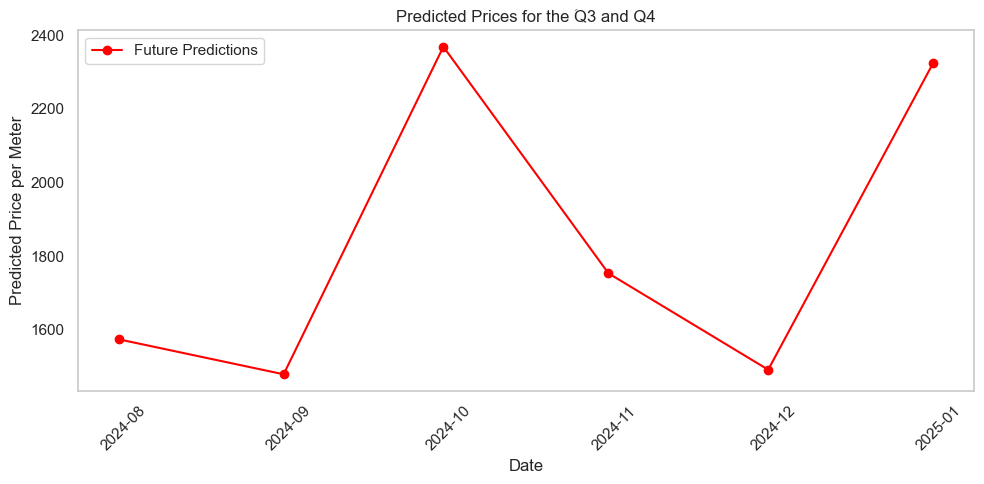

In [286]:
plt.figure(figsize=(10, 5))
plt.plot(future_results['Date'], future_results['Predicted Price per Meter'], marker='o', color='red', label='Future Predictions')

# Formatting the plot
plt.title('Predicted Prices for the ََQ3 and Q4')
plt.xlabel('Date')
plt.ylabel('Predicted Price per Meter')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()